<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/example-CNN-Tensorflow/neural_network_example_CNN_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt

In [ ]:
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-39zw2ljv
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-39zw2ljv


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pima-indians-diabetes.data.csv to pima-indians-diabetes.data (1).csv


In [ ]:
# load the dataset
dataset = loadtxt('pima-indians-diabetes.data.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

data:
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)

In [ ]:
len(X)

768

The model expects rows of data with 8 variables (the input_shape=(8,) argument).

The first hidden layer has 12 nodes and uses the relu activation function.

The second hidden layer has 8 nodes and uses the relu activation function.

The output layer has one node and uses the sigmoid activation function.

In [ ]:
# define the keras model
model = Sequential() 
# последовательный тип нейросети - слои классически связаны один с другим последовательно

# overfitting example
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# normal example
#model.add(Dense(12, input_shape=(8,), activation='relu'))
#model.add(Dense(8, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))

Примеры четких функций активации:

exponential(...): Exponential activation function.

hard_sigmoid(...): Hard sigmoid activation function.

linear(...): Linear activation function (pass-through).

sigmoid(...): Sigmoid activation function, sigmoid(x) = 1 / (1 + exp(-x)).

softmax(...): Softmax converts a vector of values to a probability distribution.

softplus(...): Softplus activation function, softplus(x) = log(exp(x) + 1).

softsign(...): Softsign activation function, softsign(x) = x / (abs(x) + 1).

swish(...): Swish activation function, swish(x) = x * sigmoid(x).

tanh(...): Hyperbolic tangent activation function.

https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

In [ ]:
# compile the keras model, ADAM = adaptive moment estimation.
model.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])

# LOSS 
class **BinaryCrossentropy**: Computes the cross-entropy loss between true labels and predicted labels.

class **KLDivergence**: Computes Kullback-Leibler divergence loss between y_true & y_pred.

class **Loss**: Loss base class.

class **MeanAbsoluteError**: Computes the mean of absolute difference between labels and predictions.

class **MeanSquaredError**: Computes the mean of squares of errors between labels and predictions.

# Optimazer
class SGD: Gradient descent (with momentum) optimizer.

In [ ]:
# fit the keras model on the dataset. y = target data
history = model.fit(X, y, epochs=30, batch_size=8, verbose = 0, validation_split = 0.9, shuffle = False)

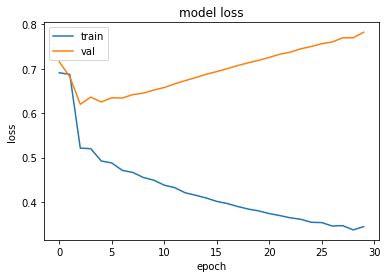

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

In [ ]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 12)                108       
                                                                 
 dense_89 (Dense)            (None, 64)                832       
                                                                 
 dense_90 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,005
Trainable params: 1,005
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# evaluate the keras model
loss_of_model, accuracy = model.evaluate(X, y, verbose = 2)
print('Accuracy: %.2f' % (accuracy*100))
print('Loss of the Model: %.3f' % (loss_of_model))

24/24 - 0s - loss: 0.2292 - accuracy: 0.6445 - 54ms/epoch - 2ms/step
Accuracy: 64.45
Loss of the Model: 0.229


In [ ]:
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(15):
 print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

24/24 [==============================] - 0s 1ms/step
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (expected 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => 1 (expected 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => 1 (expected 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => 0 (expected 1)
[4.0, 110.0, 92.0, 0.0, 0.0, 37.6, 0.191, 30.0] => 0 (expected 0)
[10.0, 168.0, 74.0, 0.0, 0.0, 38.0, 0.537, 34.0] => 1 (expected 1)
[10.0, 139.0, 80.0, 0.0, 0.0, 27.1, 1.441, 57.0] => 1 (expected 0)
[1.0, 189.0, 60.0, 23.0, 846.0, 30.1, 0.398, 59.0] => 0 (expected 1)
[5.0, 166.